# Exploratory Data Analysis

In [304]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

#Plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

#Subplots
from plotly.subplots import make_subplots

In [305]:
df = pd.read_csv('data/clean_listing.csv')
orig_df = pd.read_csv('data/clean_listingpre.csv')
df.head()

Unnamed: 0  neighbourhood_cleansed_Ang Mo Kio  \
0           0                                0.0   
1           1                                0.0   
2           2                                0.0   
3           3                                0.0   
4           4                                0.0   

   neighbourhood_cleansed_Bedok  neighbourhood_cleansed_Bishan  \
0                           0.0                            0.0   
1                           0.0                            0.0   
2                           0.0                            0.0   
3                           0.0                            0.0   
4                           0.0                            0.0   

   neighbourhood_cleansed_Bukit Batok  neighbourhood_cleansed_Bukit Merah  \
0                                 0.0                                 0.0   
1                                 0.0                                 0.0   
2                                 0.0                                 1.0   
3                                 0.0                                 1.0   
4                                 0.0                                 0.0   

   neighbourhood_cleansed_Bukit Panjang  neighbourhood_cleansed_Bukit Timah  \
0                                   0.0                                 0.0   
1                                   0.0                                 0.0   
2                                   0.0                                 0.0   
3                                   0.0                                 0.0   
4                                   0.0                                 0.0   

   neighbourhood_cleansed_Central Water Catchment  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   neighbourhood_cleansed_Choa Chu Kang  neighbourhood_cleansed_Clementi  \
0                                   0.0                              0.0   
1                                   0.0                              0.0   
2                                   0.0                              0.0   
3                                   0.0                              0.0   
4                                   0.0                              0.0   

   neighbourhood_cleansed_Downtown Core  neighbourhood_cleansed_Geylang  \
0                                   0.0                             0.0   
1                                   0.0                             0.0   
2                                   0.0                             0.0   
3                                   0.0                             0.0   
4                                   0.0                             0.0   

   neighbourhood_cleansed_Hougang  neighbourhood_cleansed_Jurong East  \
0                             0.0                                 0.0   
1                             0.0                                 0.0   
2                             0.0                                 0.0   
3                             0.0                                 0.0   
4                             0.0                                 0.0   

   neighbourhood_cleansed_Jurong West  neighbourhood_cleansed_Kallang  \
0                                 0.0                             0.0   
1                                 0.0                             0.0   
2                                 0.0                             0.0   
3                                 0.0                             0.0   
4                                 0.0                             0.0   

   neighbourhood_cleansed_Mandai  neighbourhood_cleansed_Marine Parade  \
0                            0.0                                   0.0   
1                            0.0                                   0.0   
2                           

### Airbnb Visualization

In [306]:
from folium.plugins import FastMarkerCluster

locations = list(zip(df.latitude, df.longitude))

map1 = folium.Map(location=[df.iloc[0]['latitude'],df.iloc[0]['longitude']],  zoom_start=9, tiles="OpenStreetMap")
FastMarkerCluster(data=locations).add_to(map1)

map1

## Factor 1: Locations

In [307]:
ms = sns.catplot(y = "neighbourhood_cleansed", data = orig_df, kind = "count", height = 8)

##### From the visualization above, we can see that predicting the price based specific location might not give the accurate results as the data is not balanced. The data is biased as the model might not be able to predict the sale price of those locations that have insufficient data. 

In [308]:
map = folium.Map(location=[df.iloc[0]['latitude'],df.iloc[0]['longitude']], 
                 zoom_start=14, control_scale=True)

#Loop through each row in the dataframe
for i,row in df.iterrows():
    #Setup the content of the popup
    iframe = folium.IFrame('Price:' + str(row["price"]))
    
    #Initialise the popup using the iframe
    popup = folium.Popup(iframe, min_width=80, max_width=80)
    
    #Add each row to the map
    folium.Marker(location=[row['latitude'],row['longitude']],
                  popup = popup).add_to(map)

In [309]:
import json
folium.Choropleth(
             geo_data = 'data/neighbourhoods.geojson',
             data=orig_df, # my dataset
             columns=['neighbourhood_cleansed', 'price'], # zip code is here for matching the geojson zipcode, sales price is the column that changes the color of zipcode areas
             key_on='feature.properties.neighbourhood', # this path contains zipcodes in str type, this zipcodes should match with our ZIP CODE column
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='SALE PRICE').add_to(map1)


In [310]:
map1

### Price Heatmap

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1500x500 with 0 Axes>

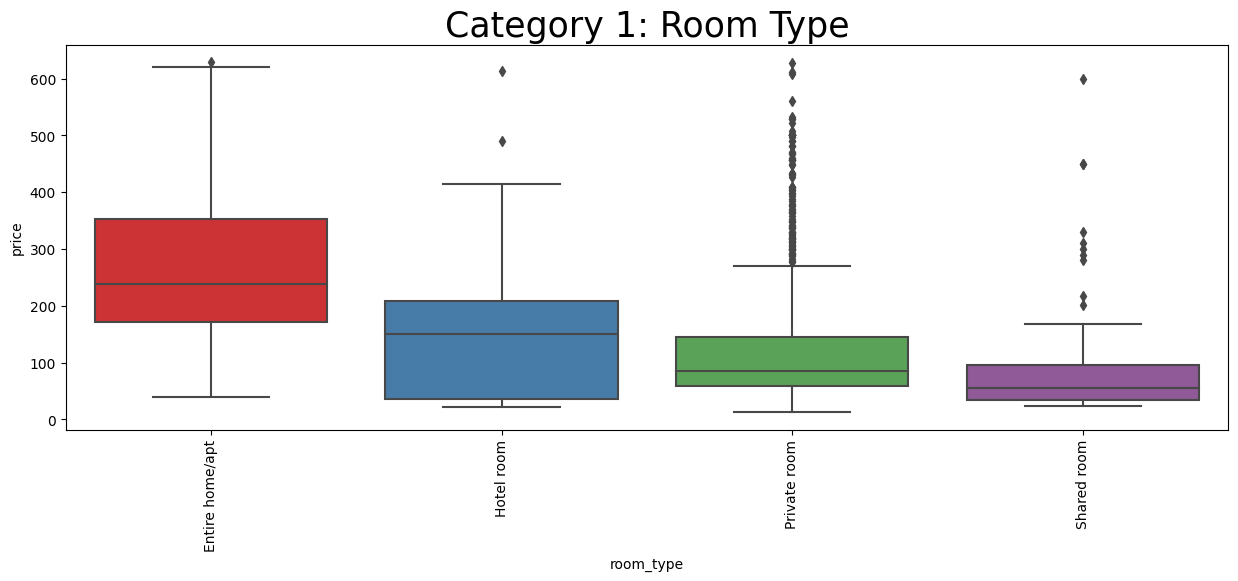

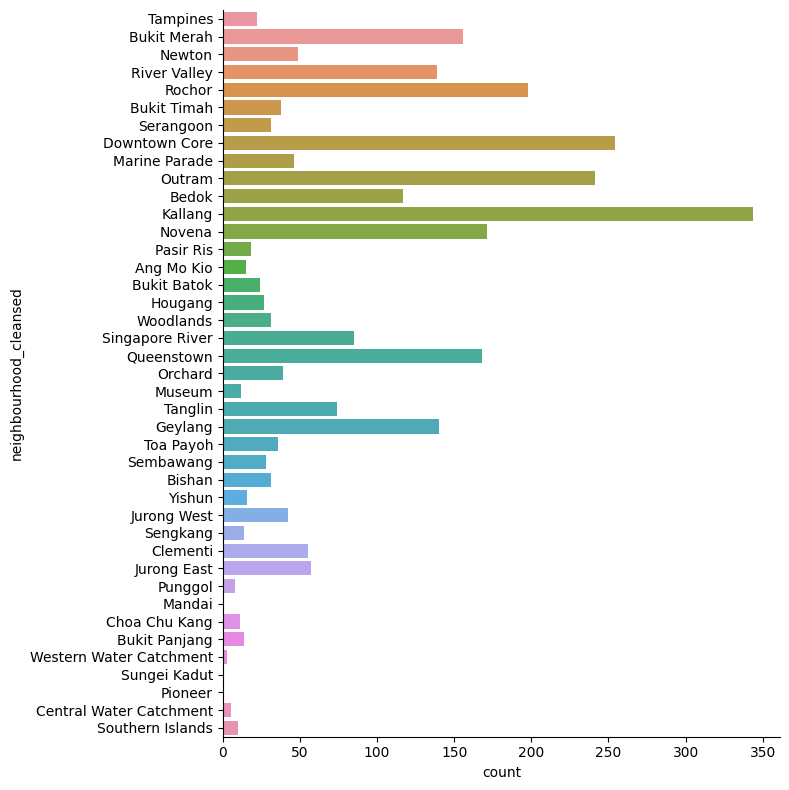

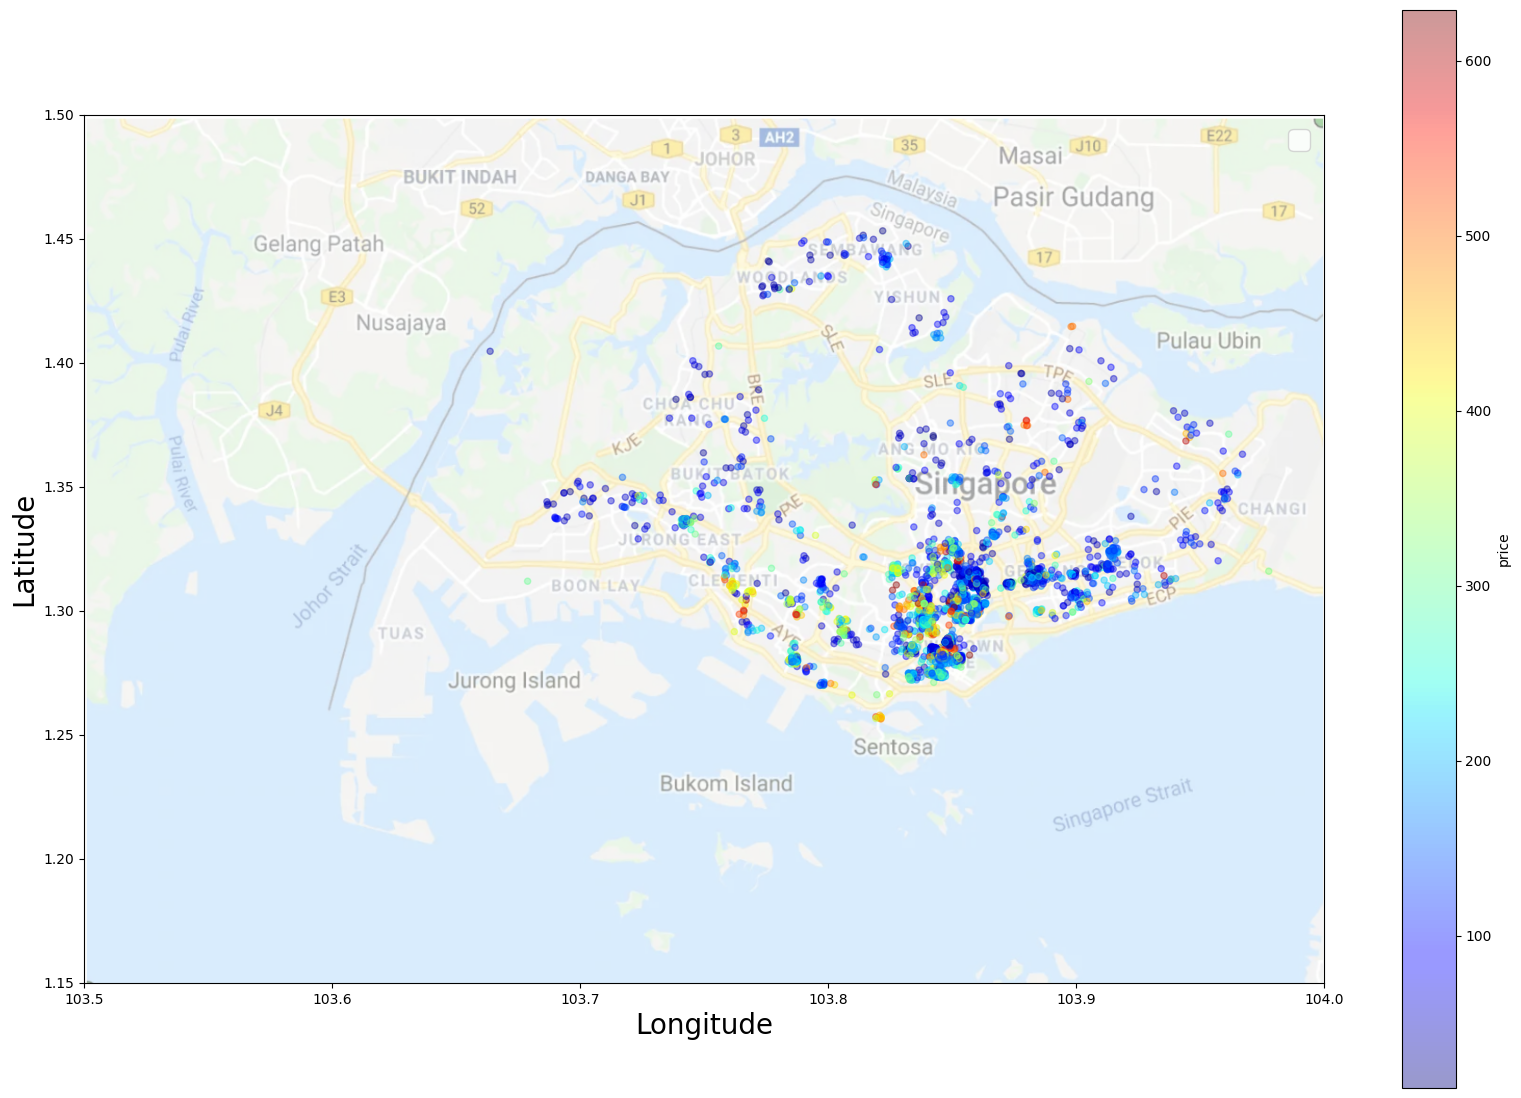

In [311]:
import matplotlib.image as mpimg
# import our image 
singapore_img = mpimg.imread('Singapore_map.png')
# plot the data
ax = df.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    figsize=(20,14),
    c="price", 
    cmap=plt.get_cmap("jet"),
    colorbar=True, 
    alpha=0.4,
)
# use our map with it's bounding coordinates
plt.imshow(singapore_img, extent=[103.5,104,1.15, 1.50], alpha=0.5)            
# add axis labels
plt.ylabel("Latitude", fontsize=20)
plt.xlabel("Longitude", fontsize=20)
# set the min/max axis values - these must be the same as above
plt.ylim(1.15, 1.50)
plt.xlim(103.5, 104)
plt.legend(fontsize=20)
plt.show()

##### From the visualization shown above, we can see the price of these rental places are all spread out which can be split into many regions depends on the price. It is hard to find any relationship based on the heatmap map and visualization map. 

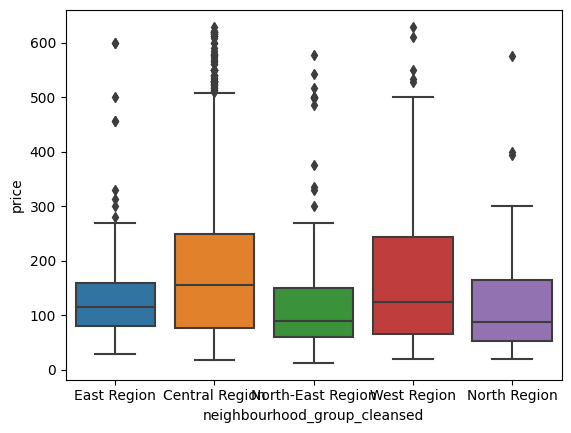

In [312]:
sns.boxplot(x="neighbourhood_group_cleansed", y="price", data=orig_df)
plt.show()

##### Since we do not have enough data for each specific location, we have to further split the data e.g. splitting into regions such as North, South, East and West of Singapore. However using these 4 regions to predict the sale price might not be effective as there are many outliers which we cannot see any relationship or correlation. And hence we have decided to make use of unsupervised learning: K mean clustering to help us to find out the clusters of regions using the spatial data: Longitude and Latitude, with also price. By using K mean clustering, it will allow us to find out the distinct groups using longitude,latitude and price

/Users/stacyliu/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



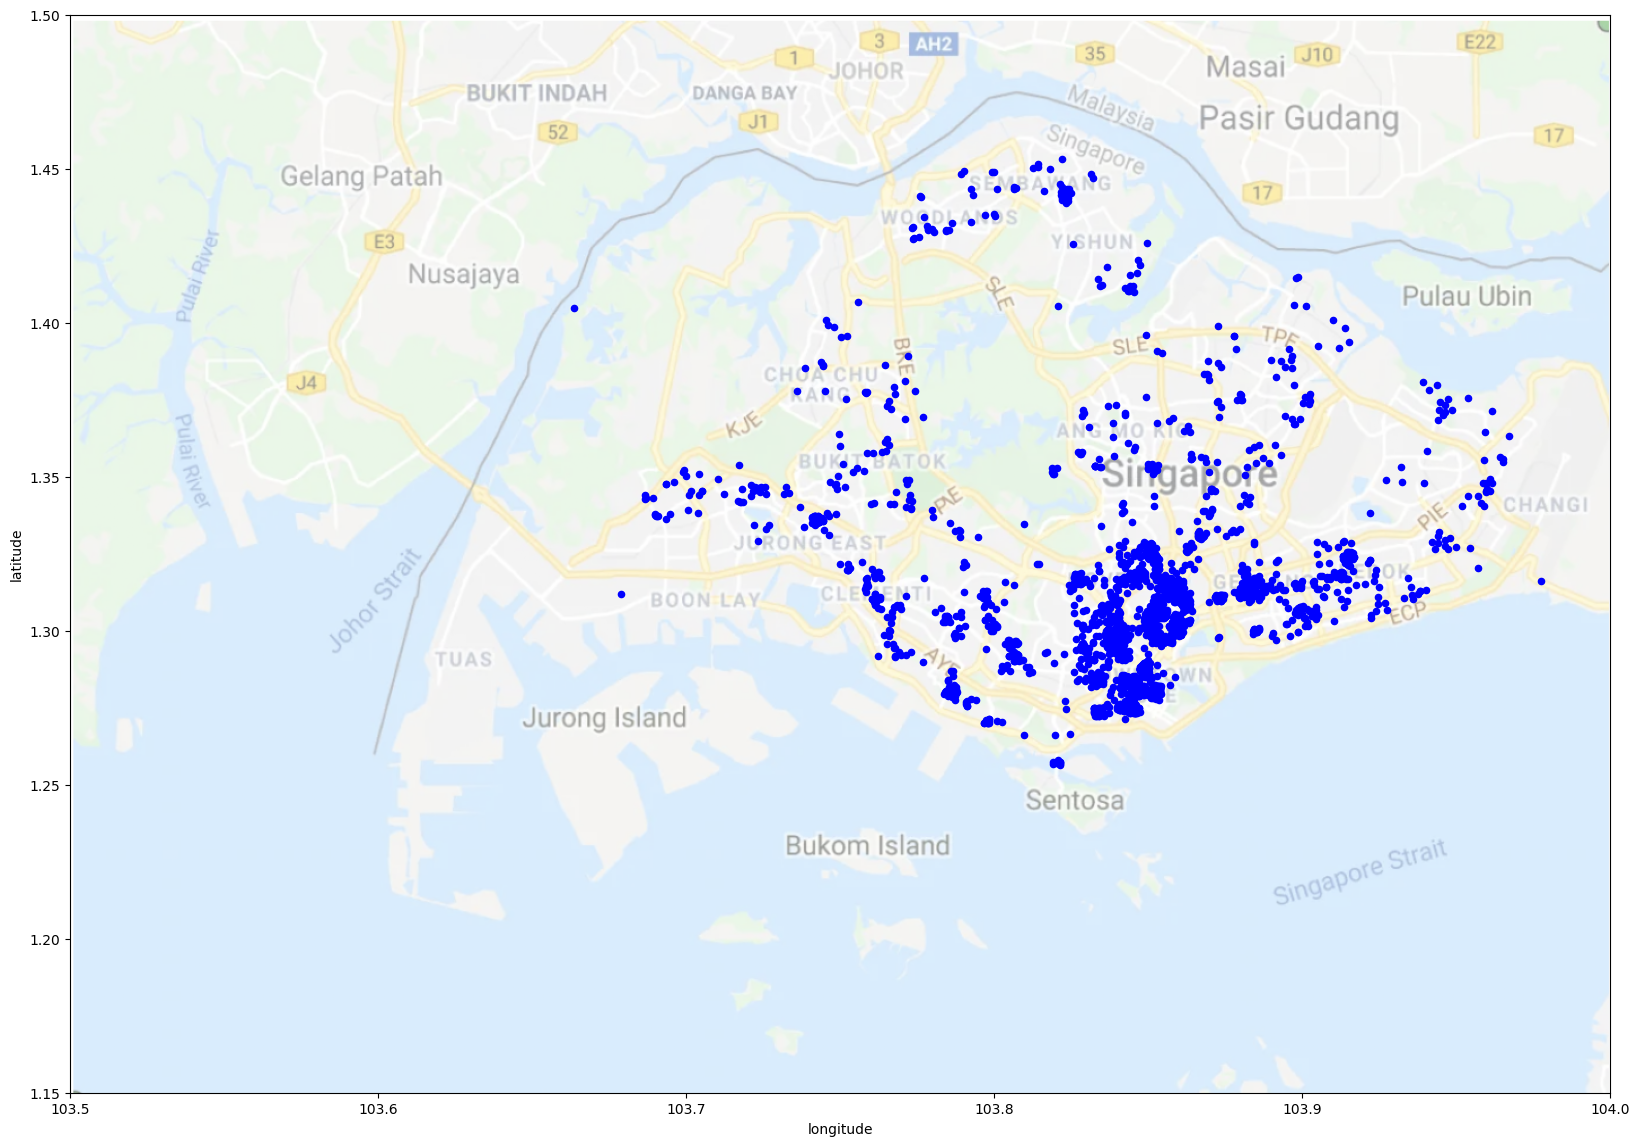

In [313]:
import matplotlib.image as mpimg
singapore_img = mpimg.imread('Singapore_map.png')

ShowMap = df.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    figsize=(20,14),
    c="blue"
)
plt.imshow(singapore_img, extent=[103.5,104,1.15, 1.50], alpha=0.5)   
plt.show()

In [314]:
# create np array for data points
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Need to scale the data
points = orig_df[['longitude', 'latitude','price']].to_numpy()
scaled_df = StandardScaler().fit_transform(points)

In [315]:
scaled_df

array([[ 2.76991683,  1.13843378, -0.74399141],
       [ 2.80357937,  1.06896947, -0.74399141],
       [-0.82012202, -0.64925961, -0.96312285],
       ...,
       [ 0.10750618, -0.73442035,  0.04941552],
       [ 1.67648508,  0.56299848, -0.7288789 ],
       [-0.50622106, -1.67447606,  1.92336712]])

##### Here we use the elbow method to determine the number of clusters for the k mean clustering to find the distinct groups. Since k mean clustering does not help us determine the distinct groups. Based on the elbow function results, I have decided to choose to split the groups into 5 as there is a elbow change (sharp change), which is the point after which the distortion/inertia starting to decrease. The optimal number of clusters is 5

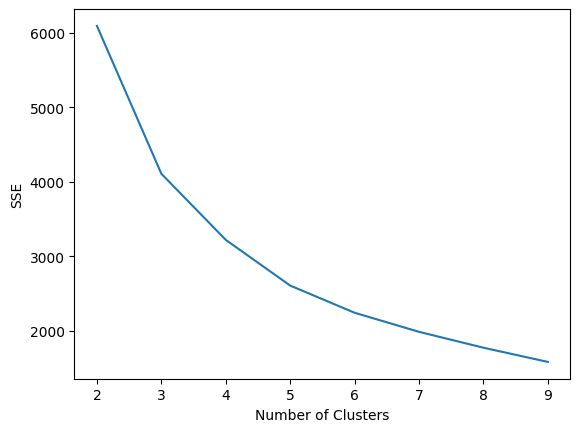

In [316]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(2, 10), sse)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [317]:
from sklearn.cluster import KMeans


# Create kmeans object
kmeans = KMeans(n_clusters=5)
# Fit kmeans object to data
kmeans.fit(points)
# print location of clusters learn by keams object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(scaled_df)

/Users/stacyliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/stacyliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[[103.83806282   1.30411365 251.90137615]
 [103.84608391   1.31837217  65.54373309]
 [103.83679886   1.30376573 512.90963855]
 [103.84623503   1.31005587 159.11825193]
 [103.83067481   1.29949086 374.59363958]]


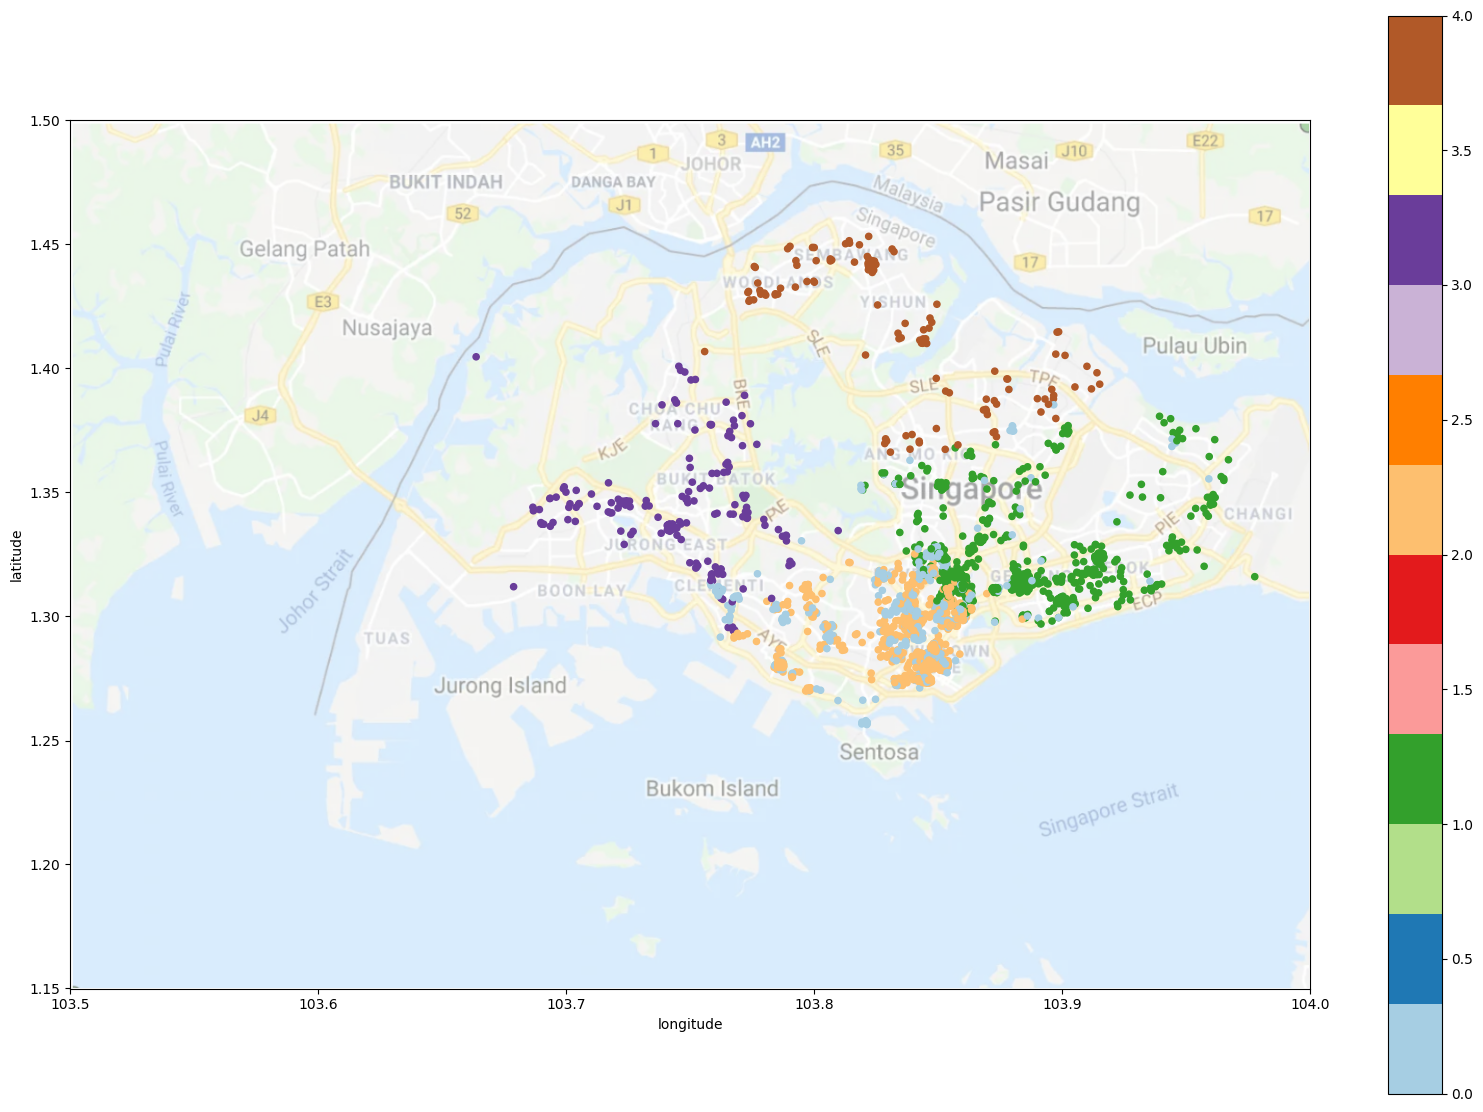

In [318]:
ShowMap = df.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    figsize=(20,14),
    c=y_km,
    cmap = "Paired"
)
plt.imshow(singapore_img, extent=[103.5,104,1.15, 1.50], alpha=0.5) 
plt.show()

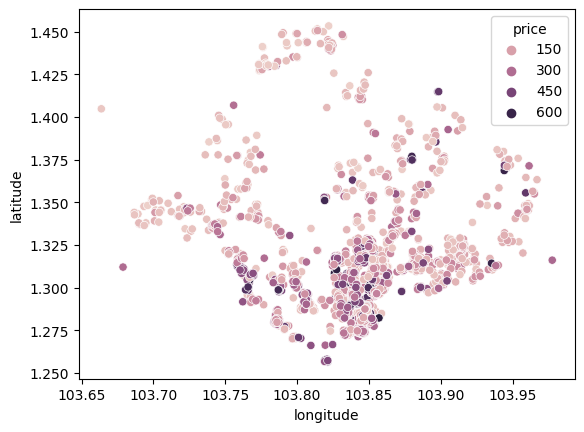

In [319]:
sns.scatterplot(data = df, x = 'longitude', y = 'latitude', hue = 'price')
plt.show()

##### Based on the K mean clustering results, where the green cluster and blue cluster are mixed. However, the cluster between the data are seem to be accurate as based on the graph above, we can see the prices are mixed up at longitude 103 and latitude 1.300. This actually shows that the k mean clustering managed to distinct those regions based on the price 

##### Using these 5 distinct region groups, we can create a new feature columns called distanceCluster that will replace the locations in Singapore. which will help us reduce columns from 130 to 84.

In [320]:
kmeans.labels_
df['distanceCluster'] = kmeans.labels_

##### By plotting a box plot, we can also see that there are very less outliers based on the distinct clusters we have created.

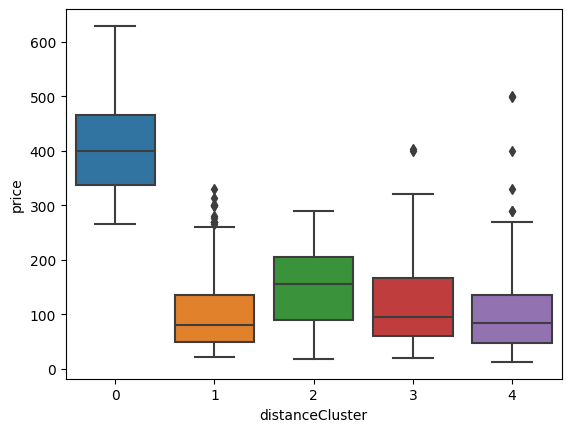

In [321]:
sns.boxplot(x="distanceCluster", y="price", data=df)
plt.show()

##### We can now drop those neighbourhood_cleansed groups columns which will help us to reduce 84 columns

In [322]:
df = df[df.columns.drop(list(df.filter(regex='neighbourhood_cleansed_')))]
df = df[df.columns.drop(list(df.filter(regex='neighbourhood_group_cleansed_')))]
df.head()

Unnamed: 0  property_type_Apartment  property_type_Hotel  \
0           0                      0.0                  0.0   
1           1                      0.0                  0.0   
2           2                      1.0                  0.0   
3           3                      1.0                  0.0   
4           4                      0.0                  0.0   

   property_type_House  property_type_Other  room_type_Entire home/apt  \
0                  1.0                  0.0                        0.0   
1                  1.0                  0.0                        0.0   
2                  0.0                  0.0                        0.0   
3                  0.0                  0.0                        0.0   
4                  1.0                  0.0                        0.0   

   room_type_Hotel room  room_type_Private room  room_type_Shared room  \
0                   0.0                     1.0                    0.0   
1                   0.0                     1.0                    0.0   
2                   0.0                     1.0                    0.0   
3                   0.0                     1.0                    0.0   
4                   0.0                     1.0                    0.0   

   host_response_rate  latitude  longitude  accommodates  bedrooms  beds  \
0                 0.9   1.34754  103.95958             1       1.0   1.0   
1                 0.9   1.34531  103.96100             2       1.0   2.0   
2                 1.0   1.29015  103.80814             1       1.0   1.0   
3                 1.0   1.28836  103.81144             1       1.0   1.0   
4                 0.9   1.34490  103.95979             4       3.0   5.0   

   price  availability_365  number_of_reviews  review_scores_rating  \
0   81.0               242                 24                  4.16   
1   81.0               305                 47                  4.41   
2   52.0               273                 22                  4.40   
3   49.0               281                 14                  4.50   
4  175.0               242                 12                  4.83   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    4.22                       4.09                   4.43   
1                    4.39                       4.52                   4.63   
2                    4.16                       4.26                   4.47   
3                    4.69                       4.23                   4.62   
4                    4.67                       4.75                   4.58   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.43                    4.17                 4.04   
1                         4.64                    4.50                 4.36   
2                         4.42                    4.53                 4.63   
3                         4.54                    4.62                 4.46   
4                         4.67                    4.33                 4.45   

   host_since_years  First aid kit  Hangers  Bathtub  Refrigerator  \
0                12          False    False    False          True   
1                12          False    False    False         False   
2                12          False    False    False         False   
3                12          False    False    False         False   
4                12          False     True     True         False   

   Security cameras on property  Bed linens  Hot water  Patio or balcony  \
0                         False       False       True             False   
1                         False       False       True             False   
2                         False       False       True             False   
3                         False       False       True             False   
4                          True       False       True             False   

   Smoke alarm  Lock o

## Show the Coefficient Matrix between variables

In [323]:
df_beforeclean = pd.read_csv('data/listings.csv')
df_beforeclean.head()

id                          listing_url       scrape_id last_scraped  \
0   71609   https://www.airbnb.com/rooms/71609  20221229070856   2022-12-29   
1   71896   https://www.airbnb.com/rooms/71896  20221229070856   2022-12-29   
2   71903   https://www.airbnb.com/rooms/71903  20221229070856   2022-12-29   
3  275343  https://www.airbnb.com/rooms/275343  20221229070856   2022-12-29   
4  275344  https://www.airbnb.com/rooms/275344  20221229070856   2022-12-29   

        source                                       name  \
0  city scrape        Ensuite Room (Room 1 & 2) near EXPO   
1  city scrape            B&B  Room 1 near Airport & EXPO   
2  city scrape                 Room 2-near Airport & EXPO   
3  city scrape  Amazing Room with window 10min to Redhill   
4  city scrape          15 mins to Outram MRT Single Room   

                                         description  \
0  For 3 rooms.Book room 1&2 and room 4<br /><br ...   
1  <b>The space</b><br />Vocational Stay Deluxe B...   
2  Like your own home, 24hrs access.<br /><br /><...   
3  Awesome location and host <br />Room near INSE...   
4  Lovely home for the special guest !<br /><br /...   

                               neighborhood_overview  \
0                                                NaN   
1                                                NaN   
2  Quiet and view of the playground with exercise...   
3                                                NaN   
4       Bus stop <br />Food center <br />Supermarket   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/24453191/3580...   367042   
1  https://a0.muscache.com/pictures/2440674/ac4f4...   367042   
2  https://a0.muscache.com/pictures/568743/7bc623...   367042   
3  https://a0.muscache.com/pictures/miso/Hosting-...  1439258   
4  https://a0.muscache.com/pictures/miso/Hosting-...  1439258   

                                    host_url host_name  host_since  \
0   https://www.airbnb.com/users/show/367042   Belinda  2011-01-29   
1   https://www.airbnb.com/users/show/367042   Belinda  2011-01-29   
2   https://www.airbnb.com/users/show/367042   Belinda  2011-01-29   
3  https://www.airbnb.com/users/show/1439258       Kay  2011-11-24   
4  https://www.airbnb.com/users/show/1439258       Kay  2011-11-24   

  host_location                                         host_about  \
0     Singapore  Hi My name is Belinda -Housekeeper \n\nI would...   
1     Singapore  Hi My name is Belinda -Housekeeper \n\nI would...   
2     Singapore  Hi My name is Belinda -Housekeeper \n\nI would...   
3     Singapore  K2 Guesthouse is designed for guests who want ...   
4     Singapore  K2 Guesthouse is designed for guests who want ...   

   host_response_time host_response_rate host_acceptance_rate  \
0  within a few hours                90%                 100%   
1  within a few hours                90%                 100%   
2  within a few hours                90%                 100%   
3      within an hour               100%                  85%   
4      within an hour               100%                  85%   

  host_is_superhost                                 host_thumbnail_url  \
0                 f  https://a0.muscache.com/im/users/367042/profil...   
1                 f  https://a0.muscache.com/im/users/367042/profil...   
2                 f  https://a0.muscache.com/im/users/367042/profil...   
3                 f  https://a0.muscache.com/im/pictures/user/7245b...   
4                 f  https://a0.muscache.com/im/pictures/user/7245b...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/users/367042/profil...           Tampines   
1  https://a0.muscache.com/im/users/367042/profil...           Tampines   
2  https://a0.muscache.com/im/users/367042/profil...           Tampines   
3  https://a0.muscache.com/im/pictures/user/7245b...        Bukit Merah   
4  https://a0.muscache.com/im/pictures/user/724

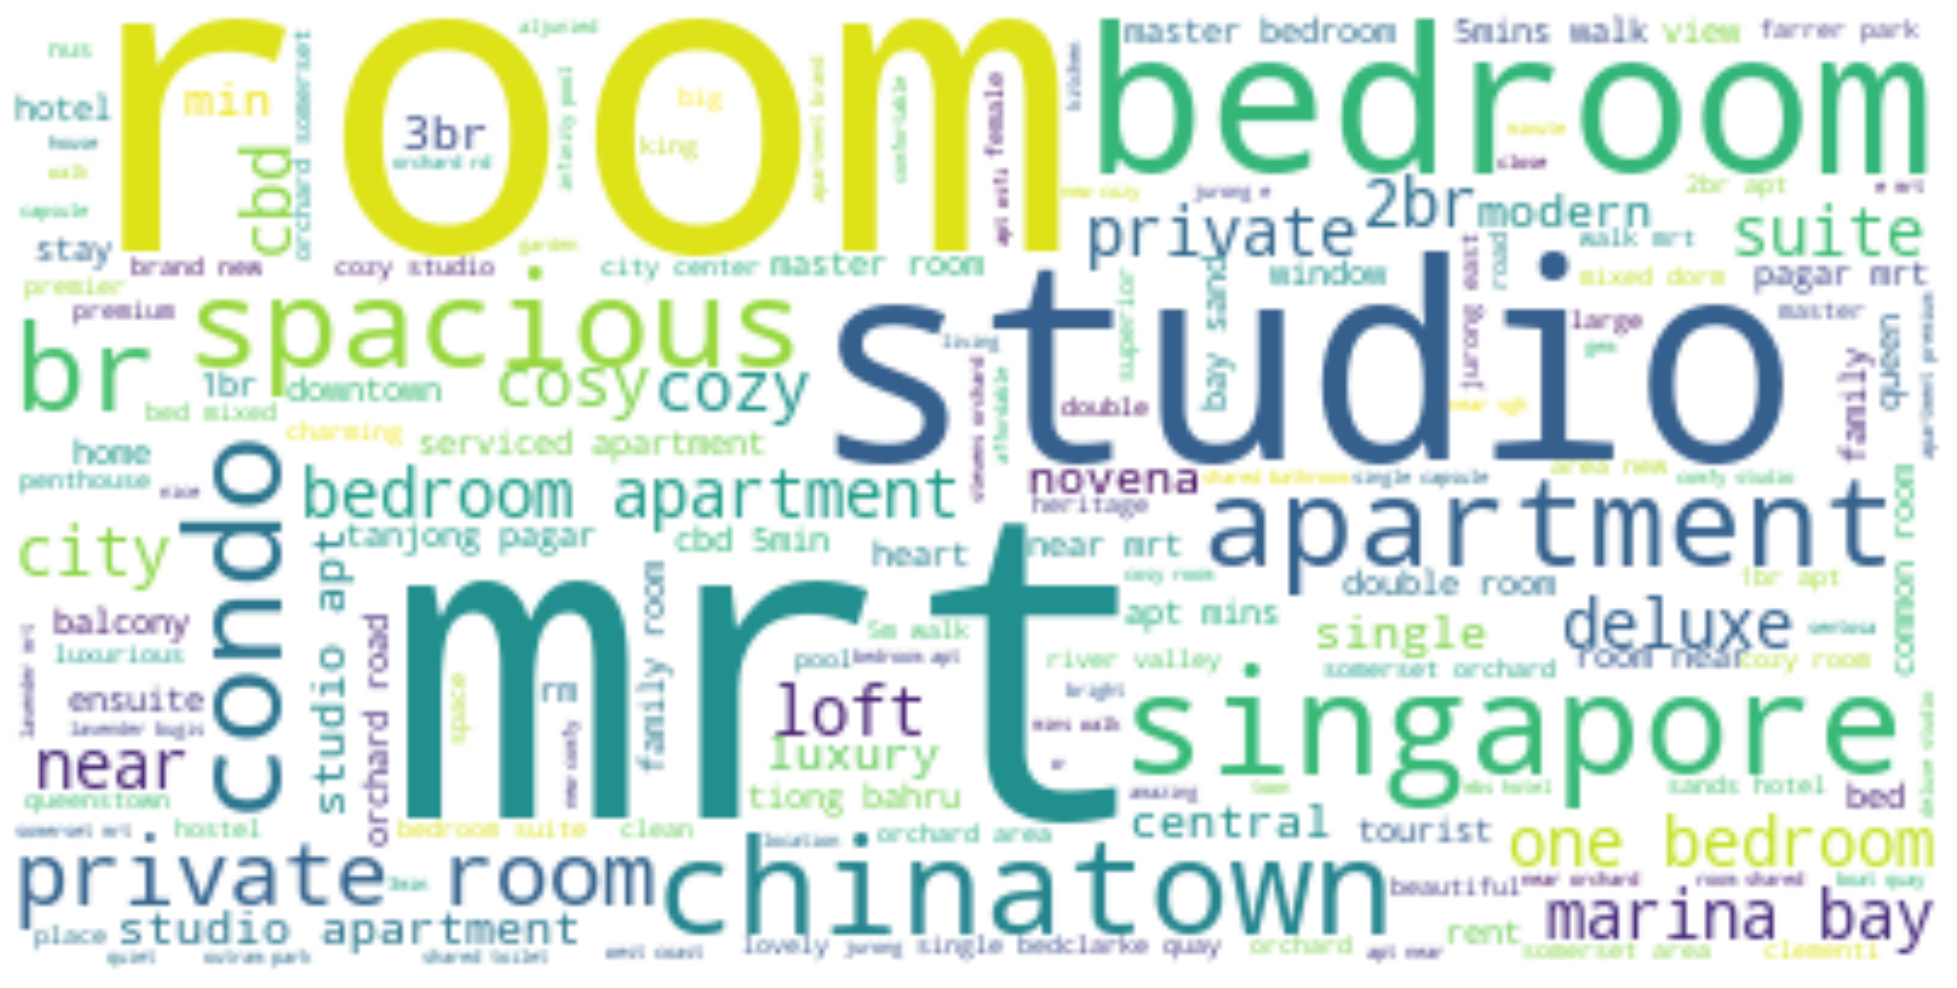

In [324]:
from wordcloud import WordCloud, ImageColorGenerator
text = ' '.join(str(n).lower() for n in df_beforeclean.name)
#Generate wordcloud image
wordcloud = WordCloud(max_words=200, background_color = 'white').generate(text)
plt.figure(figsize=(25,20))
#Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Evaluate Other Factors

In [325]:
pd.set_option('display.max_columns', None)
df.head()

Unnamed: 0  property_type_Apartment  property_type_Hotel  \
0           0                      0.0                  0.0   
1           1                      0.0                  0.0   
2           2                      1.0                  0.0   
3           3                      1.0                  0.0   
4           4                      0.0                  0.0   

   property_type_House  property_type_Other  room_type_Entire home/apt  \
0                  1.0                  0.0                        0.0   
1                  1.0                  0.0                        0.0   
2                  0.0                  0.0                        0.0   
3                  0.0                  0.0                        0.0   
4                  1.0                  0.0                        0.0   

   room_type_Hotel room  room_type_Private room  room_type_Shared room  \
0                   0.0                     1.0                    0.0   
1                   0.0                     1.0                    0.0   
2                   0.0                     1.0                    0.0   
3                   0.0                     1.0                    0.0   
4                   0.0                     1.0                    0.0   

   host_response_rate  latitude  longitude  accommodates  bedrooms  beds  \
0                 0.9   1.34754  103.95958             1       1.0   1.0   
1                 0.9   1.34531  103.96100             2       1.0   2.0   
2                 1.0   1.29015  103.80814             1       1.0   1.0   
3                 1.0   1.28836  103.81144             1       1.0   1.0   
4                 0.9   1.34490  103.95979             4       3.0   5.0   

   price  availability_365  number_of_reviews  review_scores_rating  \
0   81.0               242                 24                  4.16   
1   81.0               305                 47                  4.41   
2   52.0               273                 22                  4.40   
3   49.0               281                 14                  4.50   
4  175.0               242                 12                  4.83   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    4.22                       4.09                   4.43   
1                    4.39                       4.52                   4.63   
2                    4.16                       4.26                   4.47   
3                    4.69                       4.23                   4.62   
4                    4.67                       4.75                   4.58   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.43                    4.17                 4.04   
1                         4.64                    4.50                 4.36   
2                         4.42                    4.53                 4.63   
3                         4.54                    4.62                 4.46   
4                         4.67                    4.33                 4.45   

   host_since_years  First aid kit  Hangers  Bathtub  Refrigerator  \
0                12          False    False    False          True   
1                12          False    False    False         False   
2                12          False    False    False         False   
3                12          False    False    False         False   
4                12          False     True     True         False   

   Security cameras on property  Bed linens  Hot water  Patio or balcony  \
0                         False       False       True             False   
1                         False       False       True             False   
2                         False       False       True             False   
3                         False       False       True             False   
4                          True       False       True             False   

   Smoke alarm  Lock o

In [326]:
# no_locationFeatures = len(df.loc[:,:'neighbourhood_group_cleansed_West Region'].columns.tolist())
no_property_type = len(df.loc[:,:'property_type_Other'].columns.tolist())
no_room_type = len(df.loc[:,:'room_type_Shared room'].columns.tolist())
no_remaining_Features = len(df.loc[:,:'host_since_years'].columns.tolist())
no_showAmmenities = len(df.loc[:,:'Cleaning available during stay'].columns.tolist())
no_distance_to_facility = len(df.loc[:,:'distanceCluster'].columns.tolist())

# print("Max columns for Locations: ", no_locationFeatures)
print("Max columns for Property Type: ", no_property_type)
print("Max columns for Room Type: ", no_room_type)
print("Max columns for Remaining Features: ", no_remaining_Features)
print("Max columns for Ammenities: ", no_showAmmenities)
print("Max columns for Distance to Facility : ",no_distance_to_facility)

Max columns for Property Type:  5
Max columns for Room Type:  9
Max columns for Remaining Features:  26
Max columns for Ammenities:  79
Max columns for Distance to Facility :  85


In [327]:
# df_locationFeatures = df.iloc[:,1:47]
# df_locationFeatures['price'] = df['price']

df_property_type = df.iloc[:,0:no_property_type]
df_property_type['price'] = df['price']

df_room_type = df.iloc[:,no_property_type:no_room_type]
df_room_type['price'] = df['price']

df_showAmmenities = df.iloc[:,no_remaining_Features:no_showAmmenities]
df_showAmmenities['price'] = df['price']

df_distance_to_facility = df.iloc[:,no_showAmmenities:no_distance_to_facility]
df_distance_to_facility['price'] = df['price']

df_remaining_Features= df.iloc[:,no_room_type:no_remaining_Features]

## Factor 2: Property Type

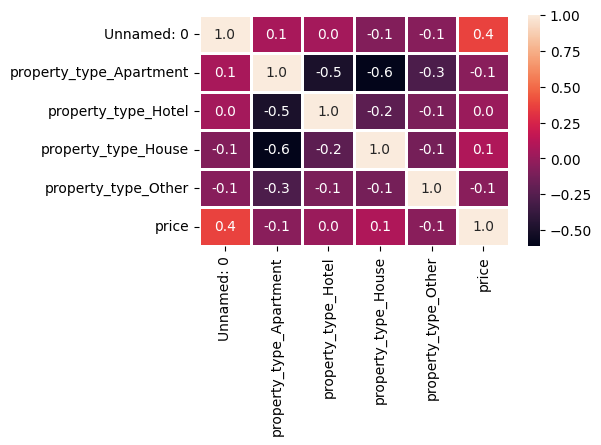

In [328]:
f,ax=plt.subplots(figsize=(5,3))
sns.heatmap(df_property_type.corr(),annot=True,linewidths=1,fmt='.1f',ax=ax)
plt.show()

### Based on this correlation map, we can see that the property type might not be factor that cause the sale price of the room to be high/low. 

## Factor 3: Room Type

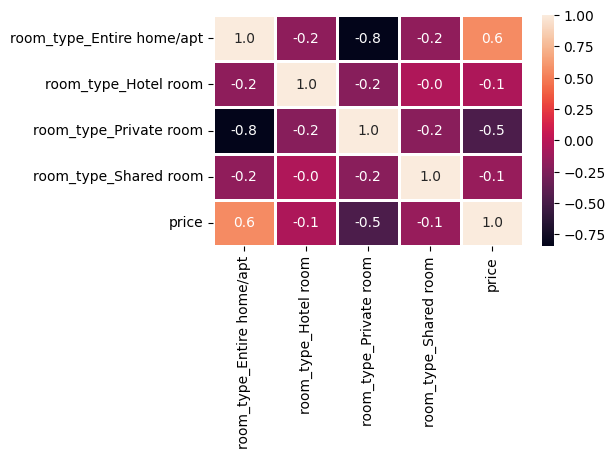

In [329]:
f,ax=plt.subplots(figsize=(5,3))
sns.heatmap(df_room_type.corr(),annot=True,linewidths=1,fmt='.1f',ax=ax)
plt.show()

### Based on the correlation map, we can see that the Room_type might be able to predict the sale price as there is negative correlation for private room and positive correlation for Entire home/apt. 

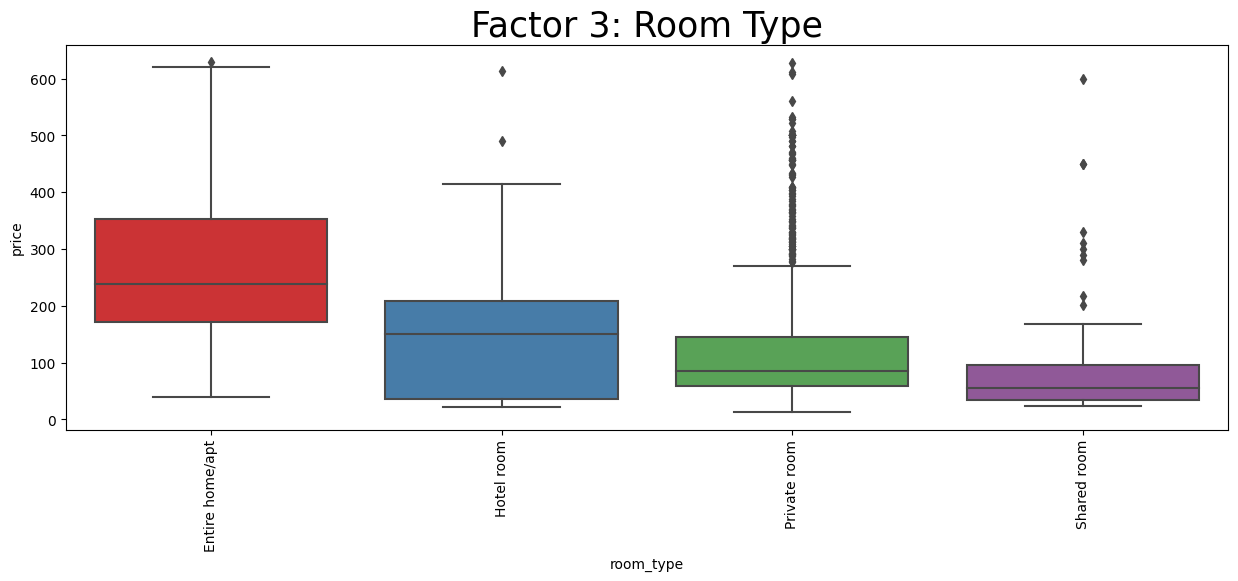

In [340]:
plt.figure(figsize=(15,5))
table = orig_df.groupby(['room_type'],as_index=False)['price'].median().sort_values(by='price',ascending=False)
ax = sns.boxplot(data=orig_df,x="room_type",y="price",order=table['room_type'].to_list(),
                palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Factor 3: Room Type", fontsize=25)
plt.show()

In [342]:
#This table tells us the count of the above feature in the dataset and calculates average Sale price.
table = orig_df.groupby(['room_type'])['room_type','price'].agg({"room_type":"count","price":"median"})
table = table.sort_values(by="price",ascending=False)
table.style.background_gradient(cmap="Reds")

/var/folders/rq/40sns37945j4jpyddbjcz2f40000gn/T/ipykernel_16328/4113335021.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



## Factor 4: Ammenities

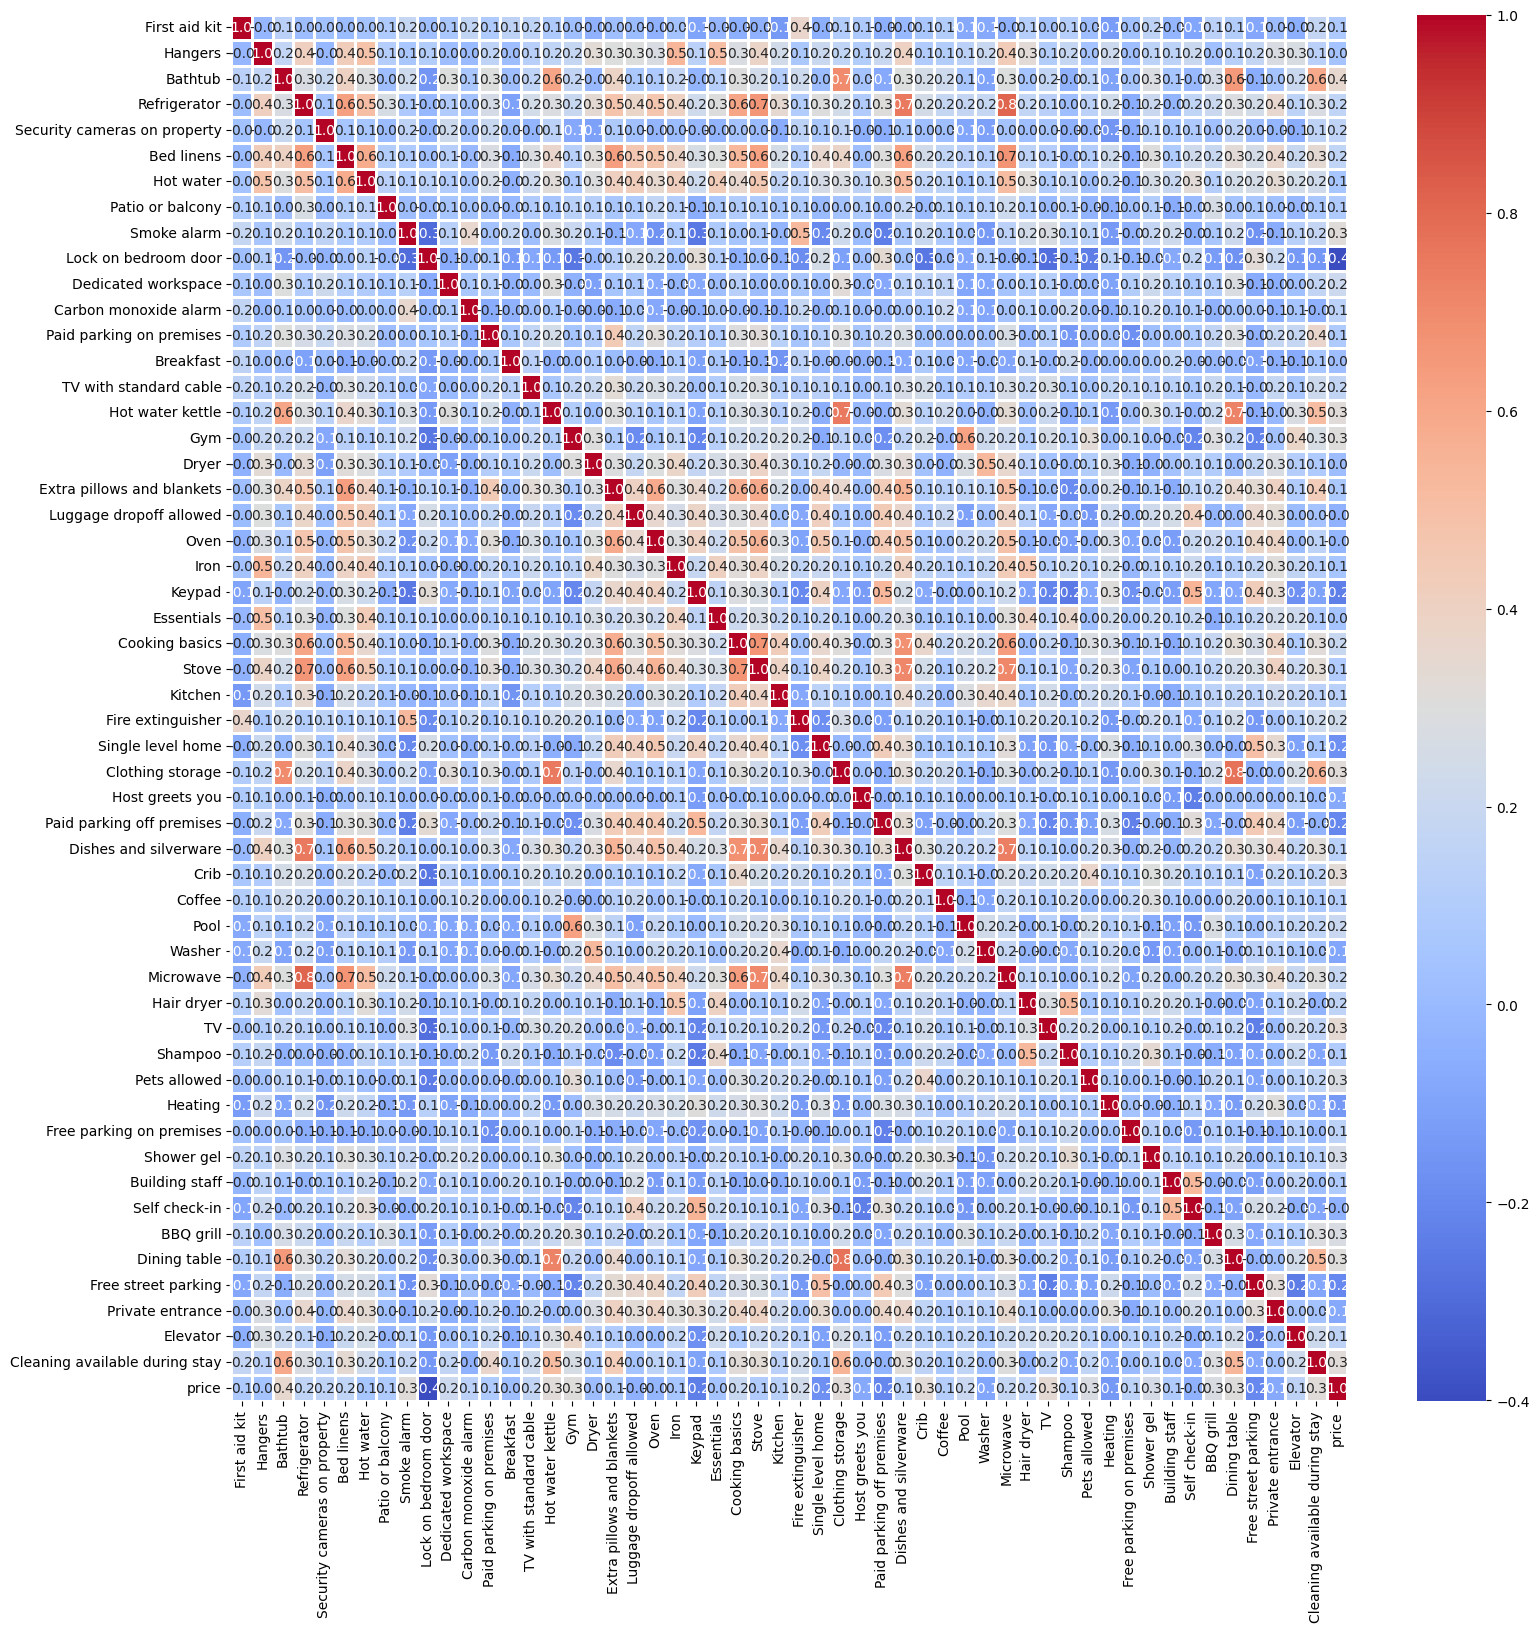

In [333]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df_showAmmenities.corr(),annot=True,linewidths=1,cmap='coolwarm',fmt='.1f',ax=ax)
plt.show() 

### Based on this correlation map, The different kinds of ammenities that the owners provide, might be one factor that will affect the sales price as most of the ammenities have correlation with price

## Factor 5: Distance to the Nearby Facility 

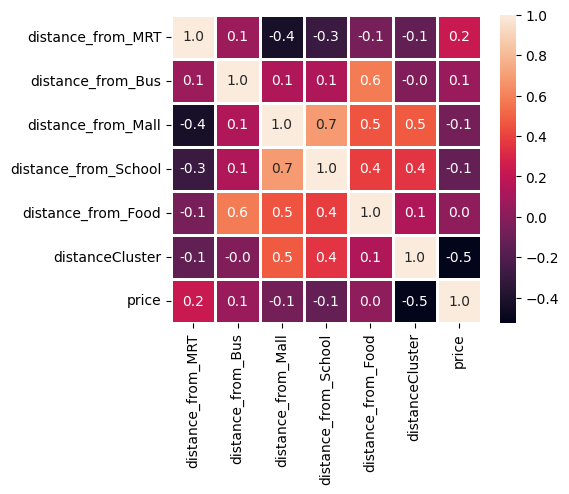

In [334]:
f,ax=plt.subplots(figsize=(5,4))
sns.heatmap(df_distance_to_facility.corr(),annot=True,linewidths=1,fmt='.1f',ax=ax)
plt.show()

### Use the Scatter Plot to visualise their correlation better. Some outliers are removed. 

In [335]:
import numpy as np

# Define the features to examine
features_to_examine = ['distance_from_MRT', 'distance_from_Bus', 'distance_from_Mall', 'distance_from_School', 'distance_from_Food', 'distanceCluster']

# Create a copy of the original dataset
df_copy = df.copy()

# Loop through each feature and remove outliers
for feature in features_to_examine:
    # Calculate the first and third quartiles
    q1 = df_copy[feature].quantile(0.25)
    q3 = df_copy[feature].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Define the upper and lower bounds
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    
    # Remove the outliers
    df_copy = df_copy[(df_copy[feature] > lower_bound) & (df_copy[feature] < upper_bound)]

# Create the scatter plots
fig = make_subplots(rows=2, cols=3, 
                    subplot_titles=["Distance from MRT", "Distance from Bus", "Distance from Mall",
                                     "Distance from School", "Distance from Food", "Distance Cluster"])
i = 0
for row in range(1, 3):
    for col in range(1, 4):
        fig.add_trace(go.Scatter(y=df_copy['price'], x=df_copy[features_to_examine[i]], name=features_to_examine[i], mode='markers'), row=row, col=col)
        fig.update_yaxes(title_text='Price', row=row, col=col)
        i += 1

fig.update_layout(
    width=1100,
    height=800,
    showlegend=True,
    title_text="Correlated features with Price"
)

fig.show()

### Based on this correlation map and scatter plot, the distances to the nearby facility might not be the significant factor that will affect the sales price.

## Factor 6: Remaining Features

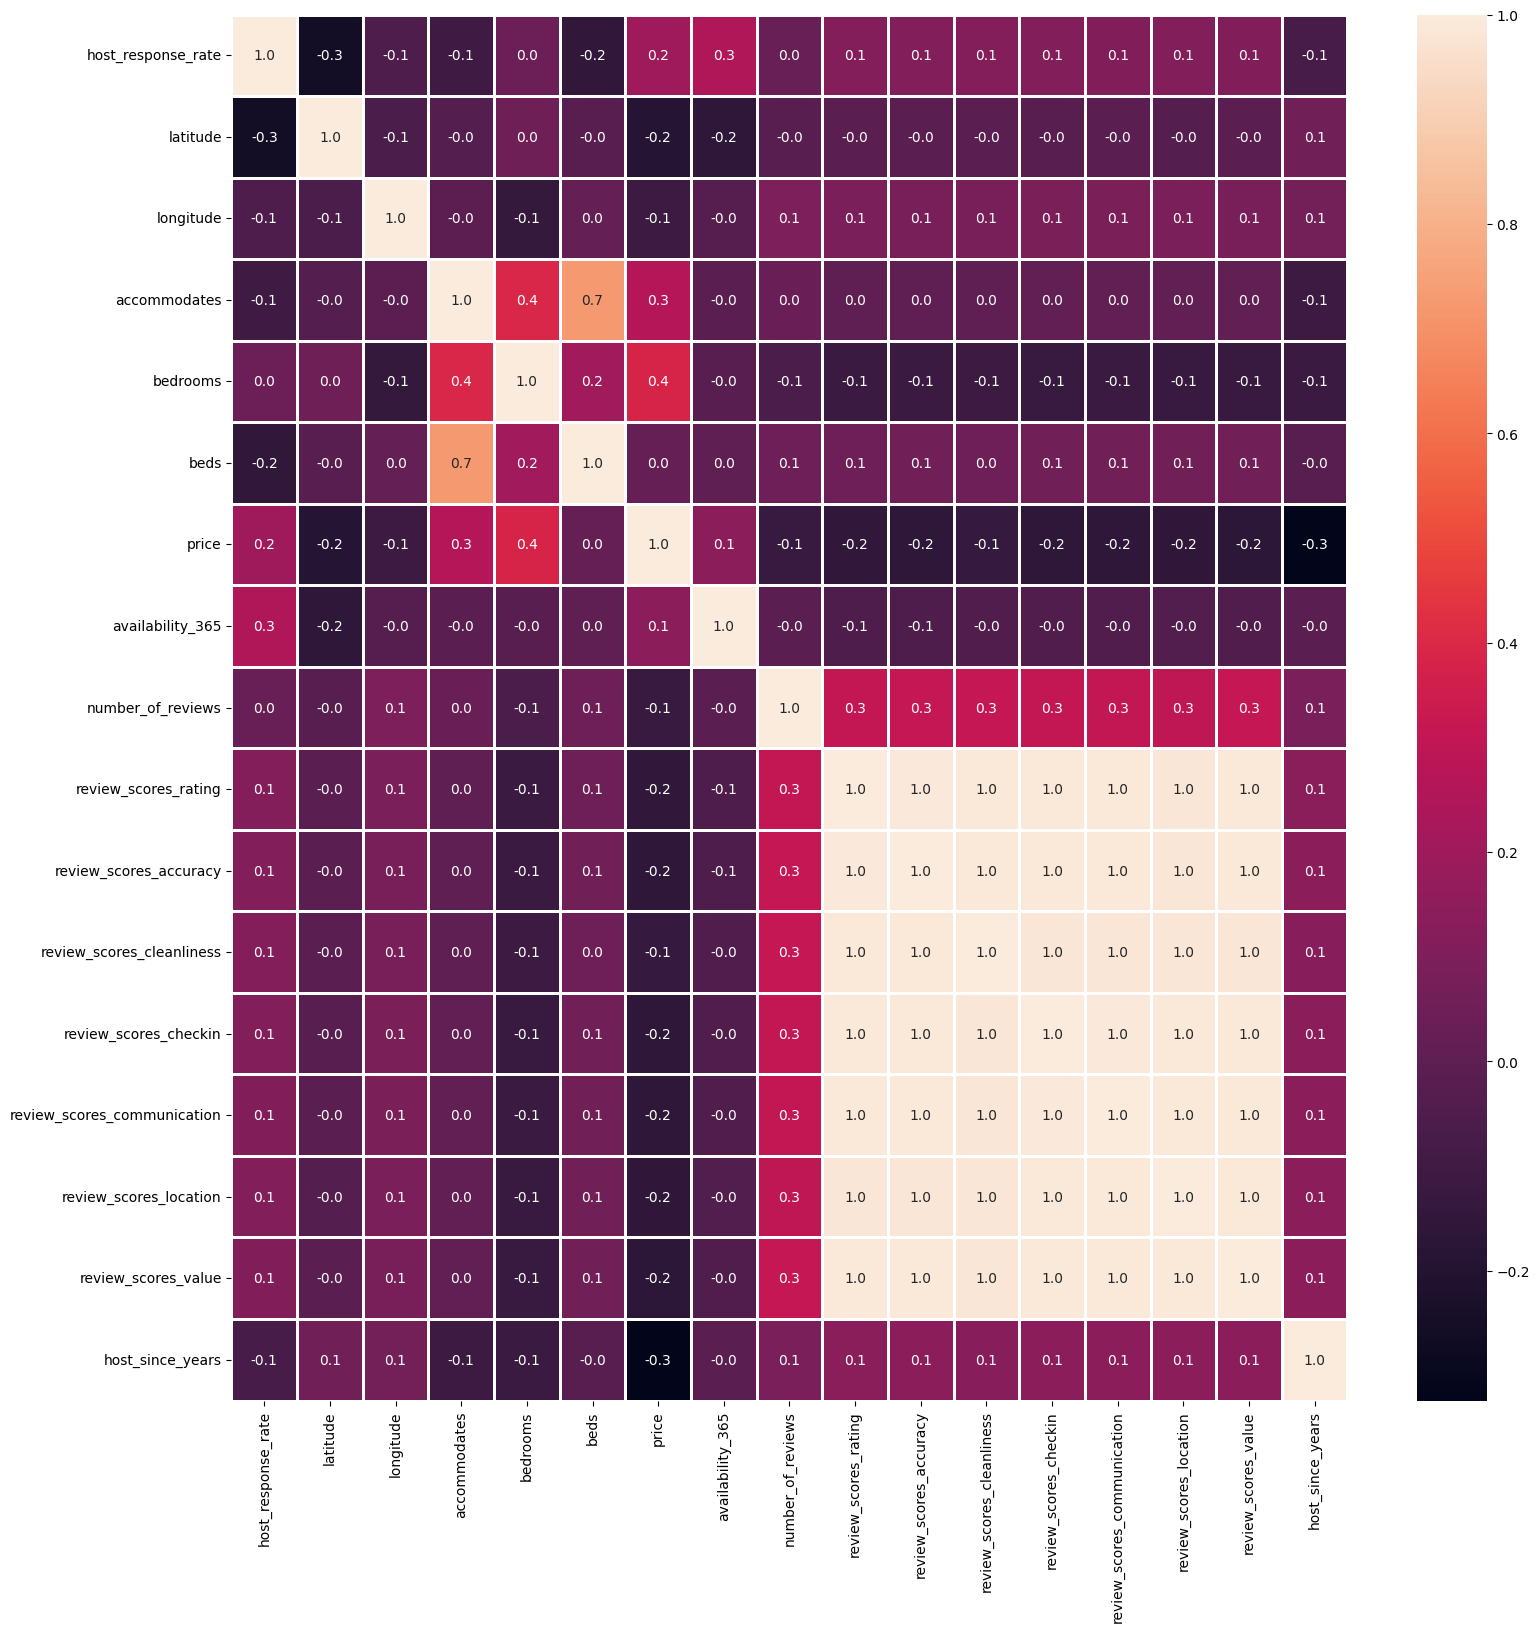

In [336]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df_remaining_Features.corr(),annot=True,linewidths=1,fmt='.1f',ax=ax)
plt.show()

### Based on the correlation map, we can see that bedrooms and the host_response_rate, might help the model to price the sales. 

In [337]:
#d1= df[['host_response_rate','bedrooms','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]
#d3 = df[['room_type_Entire home/apt','room_type_Hotel room','room_type_Private room','room_type_Shared room','distance_from_MRT']]
#result = pd.concat([d1, df_showAmmenities,d3], axis=1, join='inner')
#pd.set_option('display.max_columns',None)
#X.head()

In [338]:
df.columns

Index(['Unnamed: 0', 'property_type_Apartment', 'property_type_Hotel',
       'property_type_House', 'property_type_Other',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'host_response_rate',
       'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'price',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'host_since_years',
       'First aid kit', 'Hangers', 'Bathtub', 'Refrigerator',
       'Security cameras on property', 'Bed linens', 'Hot water',
       'Patio or balcony', 'Smoke alarm', 'Lock on bedroom door',
       'Dedicated workspace', 'Carbon monoxide alarm',
       'Paid parking on premises', 'Breakfast', 'TV with standard cable',
       'Hot water kettle', 'Gym', 'Dryer', 'Extra pillows and b

In [339]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.to_csv('data/clean_listing.csv')

Reference: 
https://www.kaggle.com/code/siddheshpujari/eda-and-prediction-of-house-price